---
---
---
---
**Papagoudis Georgios**

- **Automated Data Collection with WebScraping and APIs**
- **Text Preprocessing, Natural Language Preprocessing, Sentiment Analysis**
- **Text Representation, Topic Mining**

Advanced Computational Methods

Technical University of Munich

Hochschule für Politik München

Computational Social Science


---
---

# Part 1: News and COVID

## Data Description

For this assignment, we are going to analyze a dataset, called ReCOVery, about COVID-19 News Credibility.

ReCOVery dataset collects verified news statements or articles about the coronavirus (i.e., content information) and their dissemination on Twitter (social context information).
ReCOVery data focus on English news articles while corresponding tweets can be non-English.

The dataset includes the following files:

<!-- Below you can find more detailed information about the structure of the `data` folder given to you, as well as more details about the features in each file. -->

- `recovery-news-data.csv` - Samples of all news articles collected from reliable and unreliable websites
- `recovery-social-media-data.csv` - Samples of social media information of news articles from the above websites

Each of the above CSV files is a comma-separated file and have the following respective columns:

**News Data** (`recovery-news-data.csv`)
- `news_id` - Unique identifier for each news article.
- `url` - URL of the article from the website that published respective news.
- `publisher` - Publisher of the news article.
- `publish_date` - The publishing date of the news article.
- `author` - Author or authors of the article. This field is a list of names of authors separated by a comma.
- `title` - Title of the news article.
- `image` - The head image of the news article.
- `body_text` - The complete body content of the news article.
- `political_bias` - Political bias for each news source.
- `country` - The country of the news source.
- `reliability` - reliability label of the news article (1 = reliable, 0 = unreliable).

**Social Media Data** (`recovery-social-media-data.csv`)
- `news_id` - Unique identifier for each news article.
- `tweet_id`- Unique identifier for every tweet.

Additionally, for this assignment there is another file `recovery-social-media-data_sample1000.csv` that contains a sample of 1000 rows of the Social Media Data. This sample is to be used in Part 4.2.

Across all files, `news_id` is unique to one news article only.

Reference Paper:
* Xinyi Zhou, Apurva Mulay, Emilio Ferrara, and Reza Zafarani. 2020. **ReCOVery: A Multimodal Repository for COVID-19 News Credibility Research**. In Proceedings of the 29th ACM International Conference on Information & Knowledge Management (CIKM '20). Association for Computing Machinery, New York, NY, USA, 3205–3212. https://doi.org/10.1145/3340531.3412880. Dataset: https://github.com/apurvamulay/ReCOVery

## Part 1.1 Exploring News Data (20 points)

##### Using the **News Data**, answer the following questions:

In [ ]:
import pandas as pd
News_Data = pd.read_csv('/content/recovery-news-data.csv')
News_Data.shape

(2029, 11)

In [ ]:
News_Data.columns

Index(['news_id', 'url', 'publisher', 'publish_date', 'author', 'title',
       'image', 'body_text', 'political_bias', 'country', 'reliability'],
      dtype='object')

In [ ]:
News_Data.isna().sum()

,0
news_id,0
url,0
publisher,0
publish_date,15
author,1
title,3
image,12
body_text,0
political_bias,198
country,36


##### 1. Find the frequency of reliable and unreliable news (how many news are reliable, and how many are not)

In [ ]:
# There are no 'NaN' values in the 'reliability' column. Thus, we consider the complete
# dataset for the calculation of the frequency of the 'reliability' variable:
News_Data[['news_id','reliability']].groupby(['reliability']).count()

,news_id
reliability,
0,665
1,1364


In [ ]:
# There are 665 'non-reliable' and 1364 'reliable' articles

##### 2. Find the count of news articles per country.

In [ ]:
a=News_Data[News_Data['country'].isna()]
a['news_id'].count()

36

In [ ]:
# From the total 2029 individual news articles 36 of them are of unknown/unregistered country-origin.
# The distribution of the rest 2029-36= 1193 news articles across countries is as follows:
News_Data[['news_id','country']].groupby(['country']).count()

,news_id
country,
Canada,1
Cyprus,18
Iran,34
Russia,211
UK,67
USA,1662


##### 3. Find the top 10 reliable publishers and the top 10 unreliable publishers.

In [ ]:
# As we can see each publisher can be either 'absolutely unreliable' or 'absolutely reliable'
# 0.0 <--> 0% of its articles are reliable  & 1.0 <--> 100% of its articles are reliable
ND = News_Data[['publisher','reliability']]
ND.groupby('publisher').sum()/ND.groupby('publisher').count()

,reliability
publisher,
ABC News,1.0
Activist Post,0.0
American Thinker,0.0
Big League Politics,0.0
Bipartisan Report,0.0
Business Insider,1.0
CBS News,1.0
CNBC,1.0
Chicago Sun-Times,1.0


In [ ]:
# Thus, the (un)reliability of each publisher is evaluated in absolute terms by the total publiced news articles.
# The top10 of reliable publishers are:
reliable = ND[ND['reliability']==1].groupby('publisher').count().sort_values(by=['reliability'],ascending=False).reset_index()
reliable.rename(columns={'reliability': 'num_reliab_news'}, inplace=True)
reliable[0:9]

,publisher,num_reliab_news
0,Chicago Sun-Times,322
1,Business Insider,158
2,The Verge,139
3,USA Today,118
4,National Public Radio (NPR),92
5,CBS News,67
6,Reuters,67
7,The New York Times,67
8,Politico,66


In [ ]:
# Whereas the top10 of unreliable paublishers are:
unreliable = ND[ND['reliability']==0].groupby('publisher').count().sort_values(by=['reliability'],ascending=False).reset_index()
unreliable.rename(columns={'reliability': 'num_unreliab_news'}, inplace=True)
unreliable[0:9]

,publisher,num_unreliab_news
0,Sputnik News,144
1,WorldHealth.Net,75
2,RT News,40
3,Press TV,34
4,American Thinker,32
5,Heartland Institute,30
6,Drudge Report,29
7,Pravda Report,27
8,FrontPage Magazine,25


##### 4. How the reliability is related to the **political bias**?

In [ ]:
# It makes more sense to consider and compare reliability of publishers vs political bias of publishers as the reliability
# of each individual article in our dataset depends only on its publisher
reliabilityVSbias=News_Data[['publisher','reliability','political_bias']].drop_duplicates().fillna(value='NaN')
pd.crosstab(reliabilityVSbias['political_bias'],reliabilityVSbias['reliability'])

reliability,0,1
political_bias,,
Center,0,6
Extreme left,1,0
Extreme right,9,0
Left,0,3
Left-center,0,11
NaN,13,0
Right,9,0
Right-center,1,2


In [ ]:
# As we can see from the table above:
# 1) all news-sources that are either biased towards extreme ideologies or without registered ideologies are considered unreliable.
# 2) More conservative news_sources are generally considered reliable. However,
# 3) The 'high reliability region' is centered around the left-center regime as
# all sources of left,Left-center and center bias are considered reliable whereas
# 33% of the right-center-biased and 100% of the right-biased sources are considered unreliable

## Part 1.2 Named Entities (20 points)

Using the **News Data**, answer the following questions:

##### 1. From `body_text`, extract named entities. Keep only entities of types `PERSON` and `GPE` (Geo-Political Entity). Arrange the results in a dataframe (remember to drop duplicates), which should also include the reliability of the news article. That is, the result should look like:

|   | news_id |       entity |   type | reliability |
|--:|--------:|-------------:|-------:|------------:|
| 0 |       0 |        Wuhan |    GPE |           1 |
| 1 |       0 |        China |    GPE |           1 |
| 2 |       0 | Saudi Arabia |    GPE |           1 |
| 3 |       0 |  Sabra Klein | PERSON |           1 |
| 4 |       0 |      Germany |    GPE |           1 |

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
k = []
for ent in nlp(News_Data['body_text'][0]).ents:
  k = k + [[ent.text, ent.label_]]

In [ ]:
m = []
for i in k:
  if i[1] == 'GPE' or i[1] == 'PERSON':
    m = m + [[i[0],i[1]]]

In [ ]:
# this procedure takes about 6 minutes in my PC
n = []
for i in range(0,len(News_Data)):
  for ent in nlp(News_Data['body_text'][i]).ents:
    if ent.label_ == 'GPE' or ent.label_ == 'PERSON':
      n = n + [[News_Data['news_id'][i],ent.text,ent.label_,News_Data['reliability'][i]]]

In [ ]:
Named_Entities_df = pd.DataFrame(n,columns=['news_id','entity','type','reliability']).drop_duplicates().reset_index(drop=True)
Named_Entities_df

,news_id,entity,type,reliability
0,0,Wuhan,GPE,1
1,0,China,GPE,1
2,0,Saudi Arabia,GPE,1
3,0,Sabra Klein,PERSON,1
4,0,Germany,GPE,1
...,...,...,...,...
28965,2028,Sweden,GPE,0
28966,2028,Coronavirus Lockdown,PERSON,0
28967,2028,Anything,GPE,0
28968,2028,Ron Paul,PERSON,0


 ##### 2. For every entity, find the count of mentioning news articles based on reliablility, i.e., the count of reliable-, unreliable articles and both. The result should look like:

|   |            entity |   type | n_all | n_rel | n_unrel |
|--:|------------------:|-------:|------:|------:|--------:|
| 0 |              U.S. |    GPE |   463 |   348 |     115 |
| 1 | the United States |    GPE |   358 |   232 |     126 |
| 2 |             China |    GPE |   341 |   180 |     161 |   
| 3 |                US |    GPE |   332 |   179 |     153 |   
| 4 |             Trump | PERSON |   318 |   212 |     106 |

In [ ]:
# the procedure takes around 4 minutes in my pc
df1 = Named_Entities_df[['entity','type']].drop_duplicates().reset_index(drop=True)
k = []
for i in range(0,len(df1)):
  k = k + [[df1['entity'][i],df1['type'][i],len(Named_Entities_df[(Named_Entities_df['entity']== df1['entity'][i])]),len(Named_Entities_df[(Named_Entities_df['entity']==df1['entity'][i]) & (Named_Entities_df['reliability']== 1)]),len(Named_Entities_df[(Named_Entities_df['entity']==df1['entity'][i]) & (Named_Entities_df['reliability']== 0)])]]


In [ ]:
df2 = pd.DataFrame(k,columns=['entity','type','n_all','n_rel','n_unrel'])
df2

,entity,type,n_all,n_rel,n_unrel
0,Wuhan,GPE,139,58,81
1,China,GPE,342,180,162
2,Saudi Arabia,GPE,18,8,10
3,Sabra Klein,PERSON,1,1,0
4,Germany,GPE,90,59,31
...,...,...,...,...,...
13443,Jonathan Tamari,PERSON,1,0,1
13444,Kathleen Carley,PERSON,1,0,1
13445,Advertisement\n\nCarley,PERSON,1,0,1
13446,Omar Marques,PERSON,1,0,1


##### 3. Who are the top 10 PERSONs that are mentioned in unrelieble news more than in reliable news?
    * (Bill Gates is there, right?)

In [ ]:
# the top 10 PERSONs that are mentioned in unrelieble news more than in reliable news(Bill Gates stands at 2nd place)
df2[(df2['type']=='PERSON') & (df2['n_unrel']>df2['n_rel'])].sort_values(by=['n_unrel'],ascending=False).reset_index(drop=True)[0:10]

,entity,type,n_all,n_rel,n_unrel
0,Sputnik,PERSON,42,0,42
1,Bill Gates,PERSON,41,6,35
2,Biden,PERSON,48,18,30
3,Gretchen Whitmer,PERSON,44,17,27
4,Logging Policy,PERSON,27,0,27
5,Boris Johnson,PERSON,40,14,26
6,England,PERSON,49,24,25
7,Mike Ryan,PERSON,29,5,24
8,H.R. 6666,PERSON,23,0,23
9,Bobby L. Rush,PERSON,22,0,22


##### 4. What are the top 10 GPEs that are mentioned in unrelieble news more than in reliable news?
    * (Wuhan is there, right?)

In [ ]:
# top 10 GPEs that are mentioned in unrelieble news more than in reliable news (Wuhan stands at 2nd place)
df2[(df2['type']=='GPE') & (df2['n_unrel']>df2['n_rel'])].sort_values(by=['n_unrel'],ascending=False).reset_index(drop=True)[0:10]

,entity,type,n_all,n_rel,n_unrel
0,America,GPE,224,111,113
1,Wuhan,GPE,139,58,81
2,UK,GPE,104,32,72
3,Russia,GPE,89,34,55
4,London,GPE,61,30,31
5,Iran,GPE,48,18,30
6,Moscow,GPE,42,13,29
7,India,GPE,53,26,27
8,England,GPE,49,24,25
9,Sweden,GPE,37,12,25


## Part 1.3  Topic Mining  (20 Points)

Using the `body_text` of news articles, we want to perform topic mining.
You are going to train a LDA model to mine 6 topics from the news articles.

* Use spacy for text preprocessing.
* As you construct the dictionary (with Gensim) filter out the tokens that appear in less than 2 documents.
* As you train the LDA model, use the following parameters:
    * num_topics=6, random_state=22, update_every=3, chunksize=50, passes=10, alpha='auto'.

When the model is trained, answer the following questions:
1. What is the coherence score of the model?
2. Show each topic (top 10 tokens per topic with their probabilities).
3. How the topics are related to news reliability?
    - first, construct a Document-Topic Matrix,
    - and associate the documents (news articles) with their reliability,
    - then, use it to identify which topics are mainly covered by reliable documents, and which are mainly covered by unrelieble documents.
    - Support your answer with appropriate visualization, and prove it with appropriate statistical test.

In [ ]:
# Write your code here

## Part 1.4 Social Media Data: Exploration (20 points)

Using the **Social Media Data**, answer the following questions:

In [ ]:
Social_Data = pd.read_csv('/content/recovery-social-media-data.csv')
print(Social_Data.shape)
Social_Data

(140820, 2)


,news_id,tweet_id
0,0,1252387836239593472
1,0,1223121049325228034
2,0,1223121502838521861
3,0,1223141036354162689
4,0,1223148934538854400
...,...,...
140815,2013,1263570423511494657
140816,2013,1263570017158864898
140817,2013,1263256788419387393
140818,2013,1263586926595944453


1. How many news articles have tweets.

In [ ]:
Social_Data.isna().sum()

,0
news_id,0
tweet_id,0


In [ ]:
# The number of individual news articles that have tweets are:
Social_Data['news_id'].drop_duplicates().count()

1747

2. Find the top 10 news articles by number of tweets.

In [ ]:
# op 10 news articles by number of tweets
num_tweets=Social_Data.groupby(['news_id']).count().sort_values(by=['tweet_id'],ascending=False).reset_index()
num_tweets.rename(columns={'tweet_id': 'num_of_tweets'}, inplace=True)
num_tweets[0:10]

,news_id,num_of_tweets
0,81,3331
1,52,2301
2,88,1400
3,275,1300
4,0,1260
5,860,1100
6,188,1047
7,79,1000
8,122,1000
9,63,1000


3. Construct a dataframe that associates each news article with the publisher, reliability and number of tweets. It should look like this:

|   | news_id |                   publisher | reliability | no_tweets |
|--:|--------:|----------------------------:|------------:|----------:|
| 0 |       0 |          The New York Times |           1 |      1260 |
| 1 |       1 | National Public Radio (NPR) |           1 |         8 |
| 2 |       2 |                   The Verge |           1 |       338 |
| 3 |       4 |                   The Verge |           1 |        38 |
| 4 |       5 |           Chicago Sun-Times |           1 |         2 |
|   |     ... |                         ... |         ... |       ... |


In [ ]:
df = News_Data[['news_id','publisher','reliability']]
df['no_tweets']= 0
df

<ipython-input-433-19b5b301343e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_tweets']= 0


,news_id,publisher,reliability,no_tweets
0,0,The New York Times,1,0
1,1,National Public Radio (NPR),1,0
2,2,The Verge,1,0
3,3,WorldHealth.Net,0,0
4,4,The Verge,1,0
...,...,...,...,...
2024,2024,Drudge Report,0,0
2025,2025,Drudge Report,0,0
2026,2026,Drudge Report,0,0
2027,2027,Drudge Report,0,0


In [ ]:
# a dataframe that associates each news article with the publisher, reliability and number of tweets
for i in range(0,len(num_tweets)):
  df['no_tweets'][num_tweets['news_id'][i]] = num_tweets['num_of_tweets'][i]


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['no_tweets'][num_tweets['news_id'][i]] = num_tweets['num_of_tweets'][i]
<ipython-input-435-3e3fbcdf84fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_tweets'][num_tweets['news_id'][i]] = num_tweets['num_of_tweets'][i]
<ipython-input-435-3e3fbcdf84fc>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on w

In [ ]:
df

,news_id,publisher,reliability,no_tweets
0,0,The New York Times,1,1260
1,1,National Public Radio (NPR),1,8
2,2,The Verge,1,338
3,3,WorldHealth.Net,0,0
4,4,The Verge,1,38
...,...,...,...,...
2024,2024,Drudge Report,0,0
2025,2025,Drudge Report,0,0
2026,2026,Drudge Report,0,0
2027,2027,Drudge Report,0,0


4. Find the top 10 publishers by the number of tweets (associated with their news articles).

In [ ]:
# For each publisher we calculate the total tweets received from all their article news
num_tweets_Publicers=df.groupby(['publisher']).sum('no_tweets').sort_values(by=['no_tweets'],ascending=False).reset_index().drop(columns=['news_id','reliability'])
num_tweets_Publicers[0:10]

,publisher,no_tweets
0,National Public Radio (NPR),17897
1,The New York Times,16612
2,The Verge,13706
3,Politico,8522
4,CBS News,8471
5,USA Today,7781
6,Business Insider,7257
7,The Washington Post,6155
8,Chicago Sun-Times,5917
9,CNBC,4454


In [ ]:
# We can also find the top10 of publishers with the individual articles of the most tweets
df.sort_values(by=['no_tweets'],ascending=False).reset_index(drop=True)[0:10]

,news_id,publisher,reliability,no_tweets
0,81,National Public Radio (NPR),1,3331
1,52,Politico,1,2301
2,88,National Public Radio (NPR),1,1400
3,275,The New York Times,1,1300
4,0,The New York Times,1,1260
5,860,The New Yorker,1,1100
6,188,National Public Radio (NPR),1,1047
7,122,The Washington Post,1,1000
8,79,USA Today,1,1000
9,63,National Public Radio (NPR),1,1000


5. After excluding news articles with more than 500 tweets, compare reliable news articles to unreliable ones.
    - Which catagory is more shared (has more tweets) ?
   

In [ ]:
# excluding news articles with more than 500 tweets we get all the articles that are twitted not more than 500 times each.
less_500_tweets_news=df.sort_values(by=['no_tweets'],ascending=False).reset_index(drop=True)
less_500_tweets_news=less_500_tweets_news[less_500_tweets_news['no_tweets']<500].reset_index(drop=True)
less_500_tweets_news

,news_id,publisher,reliability,no_tweets
0,1914,Geller Report News,0,443
1,87,The New York Times,1,442
2,1105,CNBC,1,429
3,54,National Public Radio (NPR),1,420
4,299,The New York Times,1,400
...,...,...,...,...
1999,1489,The Detroit News,1,0
2000,413,Chicago Sun-Times,1,0
2001,414,WorldHealth.Net,0,0
2002,417,Chicago Sun-Times,1,0


In [ ]:
print(less_500_tweets_news[(less_500_tweets_news['reliability']==0)]['no_tweets'].sum(), ':tweets on unreliable news')
print(less_500_tweets_news[(less_500_tweets_news['reliability']==1)]['no_tweets'].sum(), ':tweets on reliable news')

26418 :tweets on unreliable news
91028 :tweets on reliable news


In [ ]:
print(less_500_tweets_news[(less_500_tweets_news['reliability']==0)]['no_tweets'].count(), ':unreliable news with at least one tweet(but less than 500)')
print(less_500_tweets_news[(less_500_tweets_news['reliability']==1)]['no_tweets'].count(), ':reliable news with at least one tweet(but less than 500)')

665 :unreliable news with at least one tweet(but less than 500)
1339 :reliable news with at least one tweet(but less than 500)


In [ ]:
print(less_500_tweets_news[(less_500_tweets_news['reliability']==0)]['no_tweets'].sum()/less_500_tweets_news[(less_500_tweets_news['reliability']==0)]['no_tweets'].count(),':expected number of tweets per unreliable article')
print(less_500_tweets_news[(less_500_tweets_news['reliability']==1)]['no_tweets'].sum()/less_500_tweets_news[(less_500_tweets_news['reliability']==1)]['no_tweets'].count(),':expected number of tweets per reliable article')

39.72631578947368 :expected number of tweets per unreliable article
67.98207617625093 :expected number of tweets per reliable article


In [ ]:
# We observe that:
# the total number of tweets on reliable articles is almost 4 times bigger than the tweets on unreliable news.
# The reliable individual news articles are almost twice the number of unreliable articles. As a consequence,
# the average number of tweets(68) that a reliable news article receives is way bigger than the expected number of tweets on an article that is unreliable
# The most shared are(hopefully!!!) the reliable article news!

 - Support your finding with appropriate visualization, and prove it with appropriate statistical test.

{'whiskers': [<matplotlib.lines.Line2D at 0x7b389bd28c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7b389bd29180>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b389bd289a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7b389bd296c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b389bd29960>,
 'means': []}

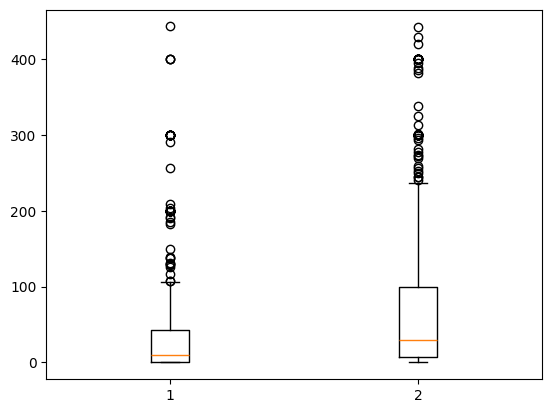

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot([less_500_tweets_news[(less_500_tweets_news['reliability']==0)]['no_tweets'],less_500_tweets_news[(less_500_tweets_news['reliability']==1)]['no_tweets']])

In [ ]:
# H0: mean(tweets per reliable article) <= mean(tweets per unreliable article) <--> H1:mean(tweets per reliable article) > mean(tweets per unreliable article
A = less_500_tweets_news[(less_500_tweets_news['reliability']==1)]['no_tweets']
B = less_500_tweets_news[(less_500_tweets_news['reliability']==0)]['no_tweets']
print(A.mean(),B.mean())
alpha = 0.01
from scipy import stats
tstat, pval = stats.ttest_ind(a=A, b=B, alternative='greater')
print("p-value: ", pval)

if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")




67.98207617625093 39.72631578947368
p-value:  2.618017954073477e-13
Reject the null hypothesis


In [ ]:
# We reject the null hypothesis at eny practical level of significance

# Part 2: Academia and COVID

## Data Description

For this part, you will be working on the COVID-19 Open Research Dataset (CORD-19). You are given a sample of the dataset, containing only the Digital Object Identifiers (DOIs).

OpenAlex is a bibliographic catalogue of scientific papers, authors and institutions (https://openalex.org/). You will use their API to obtain information about the papers. You can use one of the clients, `pyalex` to interact with the API.

`!pip install pyalex`

*Note: Make sure to time the requests to get details about all the papers in our list. One of our latest runs took around 15 minutes.*

## Part 2.1 Data Extraction (14 points)

Write a function that will use the DOI and obtain the paper details from OpenAlex. Your final dataframe should be in the following format with the specified columns:

|   | paper_id|       title |   citation_count | funder_name |
|--:|--------:|-------------:|-------:|------------:|
| 0 |       W3078133258 |        Decisional Conflict During Major Medical Treatment Decision-making: a Survey Study |    16 |           Office of the Vice Chancellor for Research and Graduate Education, University of Wisconsin-Madison |
| 1 |      W3128670394 |        Natural intertypic and intratypic recombinants of enterovirus 71 from mainland China during 2009–2018: a complete genome analysis |    7 |           Institute of Chinese Materia Medica, China Academy of Chinese Medical Sciences and Peking Union Medical College |
| 2 |       W3128670394 | Natural intertypic and intratypic recombinants of enterovirus 71 from mainland China during 2009–2018: a complete genome analysis |    7 |           Applied Basic Research Key Project of Yunnan |

In [ ]:
!pip install pyalex

In [ ]:
doi_df = pd.read_csv('/content/covid_papers_sample.csv')
doi_list = list(doi_df['doi'])

In [ ]:
def get_paper_details_with_doi(*doi_list):
 !pip install pyalex
 import pyalex
 from pyalex import Works
 l=[]
 for j in range(0,len(doi_list)):
    f=''
    for i in Works()[doi_list[j]]['grants']:
      if i == Works()[doi_list[j]]['grants'][-1]:
        f = f+i['funder_display_name']
      else:
        f = f+i['funder_display_name']+','

    l = l + [(Works()[doi_list[j]]['id'][-11:],Works()[doi_list[j]]['title'],Works()[doi_list[j]]['cited_by_count'],f )]
 df4 = pd.DataFrame(l,columns=['paper_id','title','citation_count','funders'])
 return(df4)

In [ ]:
# The above procedure took 34 minutes
df4 = get_paper_details_with_doi(*doi_list)

KeyboardInterrupt: 

## Part 2.2 Analysis (6 points)

Using the data constructed from Part 2.1, answer the following questions:

**1. On average, how many sources of funding did the papers have? How many papers have more than 2 funders?**

**2. Which funders have been the most influential? Look at top 5.**

**3. Using correlation coefficent, show if there's a relationship between the number of funders and citations received.**

,paper_id,title,citation_count,funders,funder_number
0,W4226108318,Antibody structure prediction using interpreta...,152,"AstraZeneca,Maryland Advanced Research Computi...",
1,W2268380397,Direct Visualization of Ebola Virus Fusion Tri...,70,"Division of Intramural Research, National Inst...",
2,W3183115620,Direct interaction between ABCA1 and HIV-1 Nef...,6,"Russian Foundation for Basic Research,National...",
3,W4205273216,PlayMolecule Glimpse: Understanding Protein–Li...,13,Ministerio de Asuntos Económicos y Transformac...,
4,W4226055000,Vascular cognitive impairment and dementia: An...,19,Canadian Institutes of Health Research,
5,W4205513213,Methyltransferase as Antibiotics Against Foodb...,1,King Abdulaziz University,
6,W3190912758,Stimuli-responsive nanocarriers for bacterial ...,48,"National Natural Science Foundation of China,N...",
7,W4200382863,The COVID-19 pandemic as experienced by adults...,11,"Fonds Wetenschappelijk Onderzoek,Fonds Wetensc...",
8,W4223556254,Prevalence and associated risk factors of HIV ...,4,Gilead Sciences,
9,W3134329315,Effects of Nonmonotonic Functional Responses o...,8,Delhi Technological University,


In [ ]:
#create a copy
df4_deep_copy = df4.copy(deep=True)
df4_deep_copy

,paper_id,title,citation_count,funders,funder_number
0,W4226108318,Antibody structure prediction using interpreta...,152,"AstraZeneca,Maryland Advanced Research Computi...",
1,W2268380397,Direct Visualization of Ebola Virus Fusion Tri...,70,"Division of Intramural Research, National Inst...",
2,W3183115620,Direct interaction between ABCA1 and HIV-1 Nef...,6,"Russian Foundation for Basic Research,National...",
3,W4205273216,PlayMolecule Glimpse: Understanding Protein–Li...,13,Ministerio de Asuntos Económicos y Transformac...,
4,W4226055000,Vascular cognitive impairment and dementia: An...,19,Canadian Institutes of Health Research,
5,W4205513213,Methyltransferase as Antibiotics Against Foodb...,1,King Abdulaziz University,
6,W3190912758,Stimuli-responsive nanocarriers for bacterial ...,48,"National Natural Science Foundation of China,N...",
7,W4200382863,The COVID-19 pandemic as experienced by adults...,11,"Fonds Wetenschappelijk Onderzoek,Fonds Wetensc...",
8,W4223556254,Prevalence and associated risk factors of HIV ...,4,Gilead Sciences,
9,W3134329315,Effects of Nonmonotonic Functional Responses o...,8,Delhi Technological University,


In [ ]:
df4['funder_number'] = ''
for i in range(0,len(df4)):
  df4['funder_number'][i] = len(df['funders'][i].split(','))

KeyError: 'funders'

In [ ]:
# Data frame with extra column of number of funders per paper
df4

,paper_id,title,citation_count,funders,funder_number
0,W4226108318,Antibody structure prediction using interpreta...,152,"AstraZeneca,Maryland Advanced Research Computi...",4
1,W2268380397,Direct Visualization of Ebola Virus Fusion Tri...,70,"Division of Intramural Research, National Inst...",3
2,W3183115620,Direct interaction between ABCA1 and HIV-1 Nef...,6,"Russian Foundation for Basic Research,National...",5
3,W4205273216,PlayMolecule Glimpse: Understanding Protein–Li...,13,Ministerio de Asuntos Económicos y Transformac...,5
4,W4226055000,Vascular cognitive impairment and dementia: An...,19,Canadian Institutes of Health Research,1
5,W4205513213,Methyltransferase as Antibiotics Against Foodb...,1,King Abdulaziz University,1
6,W3190912758,Stimuli-responsive nanocarriers for bacterial ...,48,"National Natural Science Foundation of China,N...",2
7,W4200382863,The COVID-19 pandemic as experienced by adults...,11,"Fonds Wetenschappelijk Onderzoek,Fonds Wetensc...",3
8,W4223556254,Prevalence and associated risk factors of HIV ...,4,Gilead Sciences,1
9,W3134329315,Effects of Nonmonotonic Functional Responses o...,8,Delhi Technological University,1


In [ ]:
#1a Average number of sources of funding per paper
df4['funder_number'].mean()

In [ ]:
#1b Papers with more than 2 funders
df4['funder_number'][df4['funder_number']>2].count()

5

In [ ]:
#3 Relationship between 'funder_number' and 'citation_count'
df4[['funder_number','citation_count']].corr()
# -1<=corr_coef<= +1 :
#If corr_coef closer to 0 --> 'number of funders does not affect(linearly at least) the number of citations'
#If corr_coef closer to +1 --> 'number of funders seems to affect positively the number of citations' {!!! but correlation IS NOT casuation}
#If corr_coef closer to -1 --> 'number of funders seems to affect negatively the number of citations' {!!! but correlation IS NOT casuation}
#

,funder_number,citation_count
funder_number,1.000000,0.301356
citation_count,0.301356,1.000000


In [ ]:
#2 Most influential funders(defined as the ones with the most appearances in papers)

s=''
for i in range(0,len(df4['funders'])):
  s = s+df4['funders'][i]

dfs = pd.DataFrame({'funders':s.split(',')})
dfs['funders'].value_counts()

,count
funders,
National Institutes of Health,4
AstraZeneca,1
Maryland Advanced Research Computing Center,1
National Institutes of HealthDivision of Intramural Research,1
National Institute of Allergy and Infectious Diseases,1
Irma T. Hirschl TrustRussian Foundation for Basic Research,1
National Institutes of HealthMinisterio de Asuntos Económicos y Transformación Digital,1
Gobierno de España,1
Agència de Gestió d'Ajuts Universitaris i de Recerca,1
